# The criminal netwrok analysis

The data and the project were originally part of the course [MITx 6.419x Data Analysis: Statistical Modeling and Computation in Applications](https://www.edx.org/course/statistics-computation-and-applications)

The data describes the evolution of the criminal network split into phases. During first 3 pahses there was no intervention by the police. The intervention were in the form of seizing the drugs without arresting the members of the netwrok. This acctions created disturbances in the network forcing them to change the shape and properties of the network.


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pygraphviz as pgv
import graphviz as gv


In [2]:
# loading the data and transfroming to the graph representation using the networkX library
phases = {}
G = {}
A = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  A[i] = nx.nx_agraph.to_agraph(G[i])

  

<ipython-input-29-d6188b08d890>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


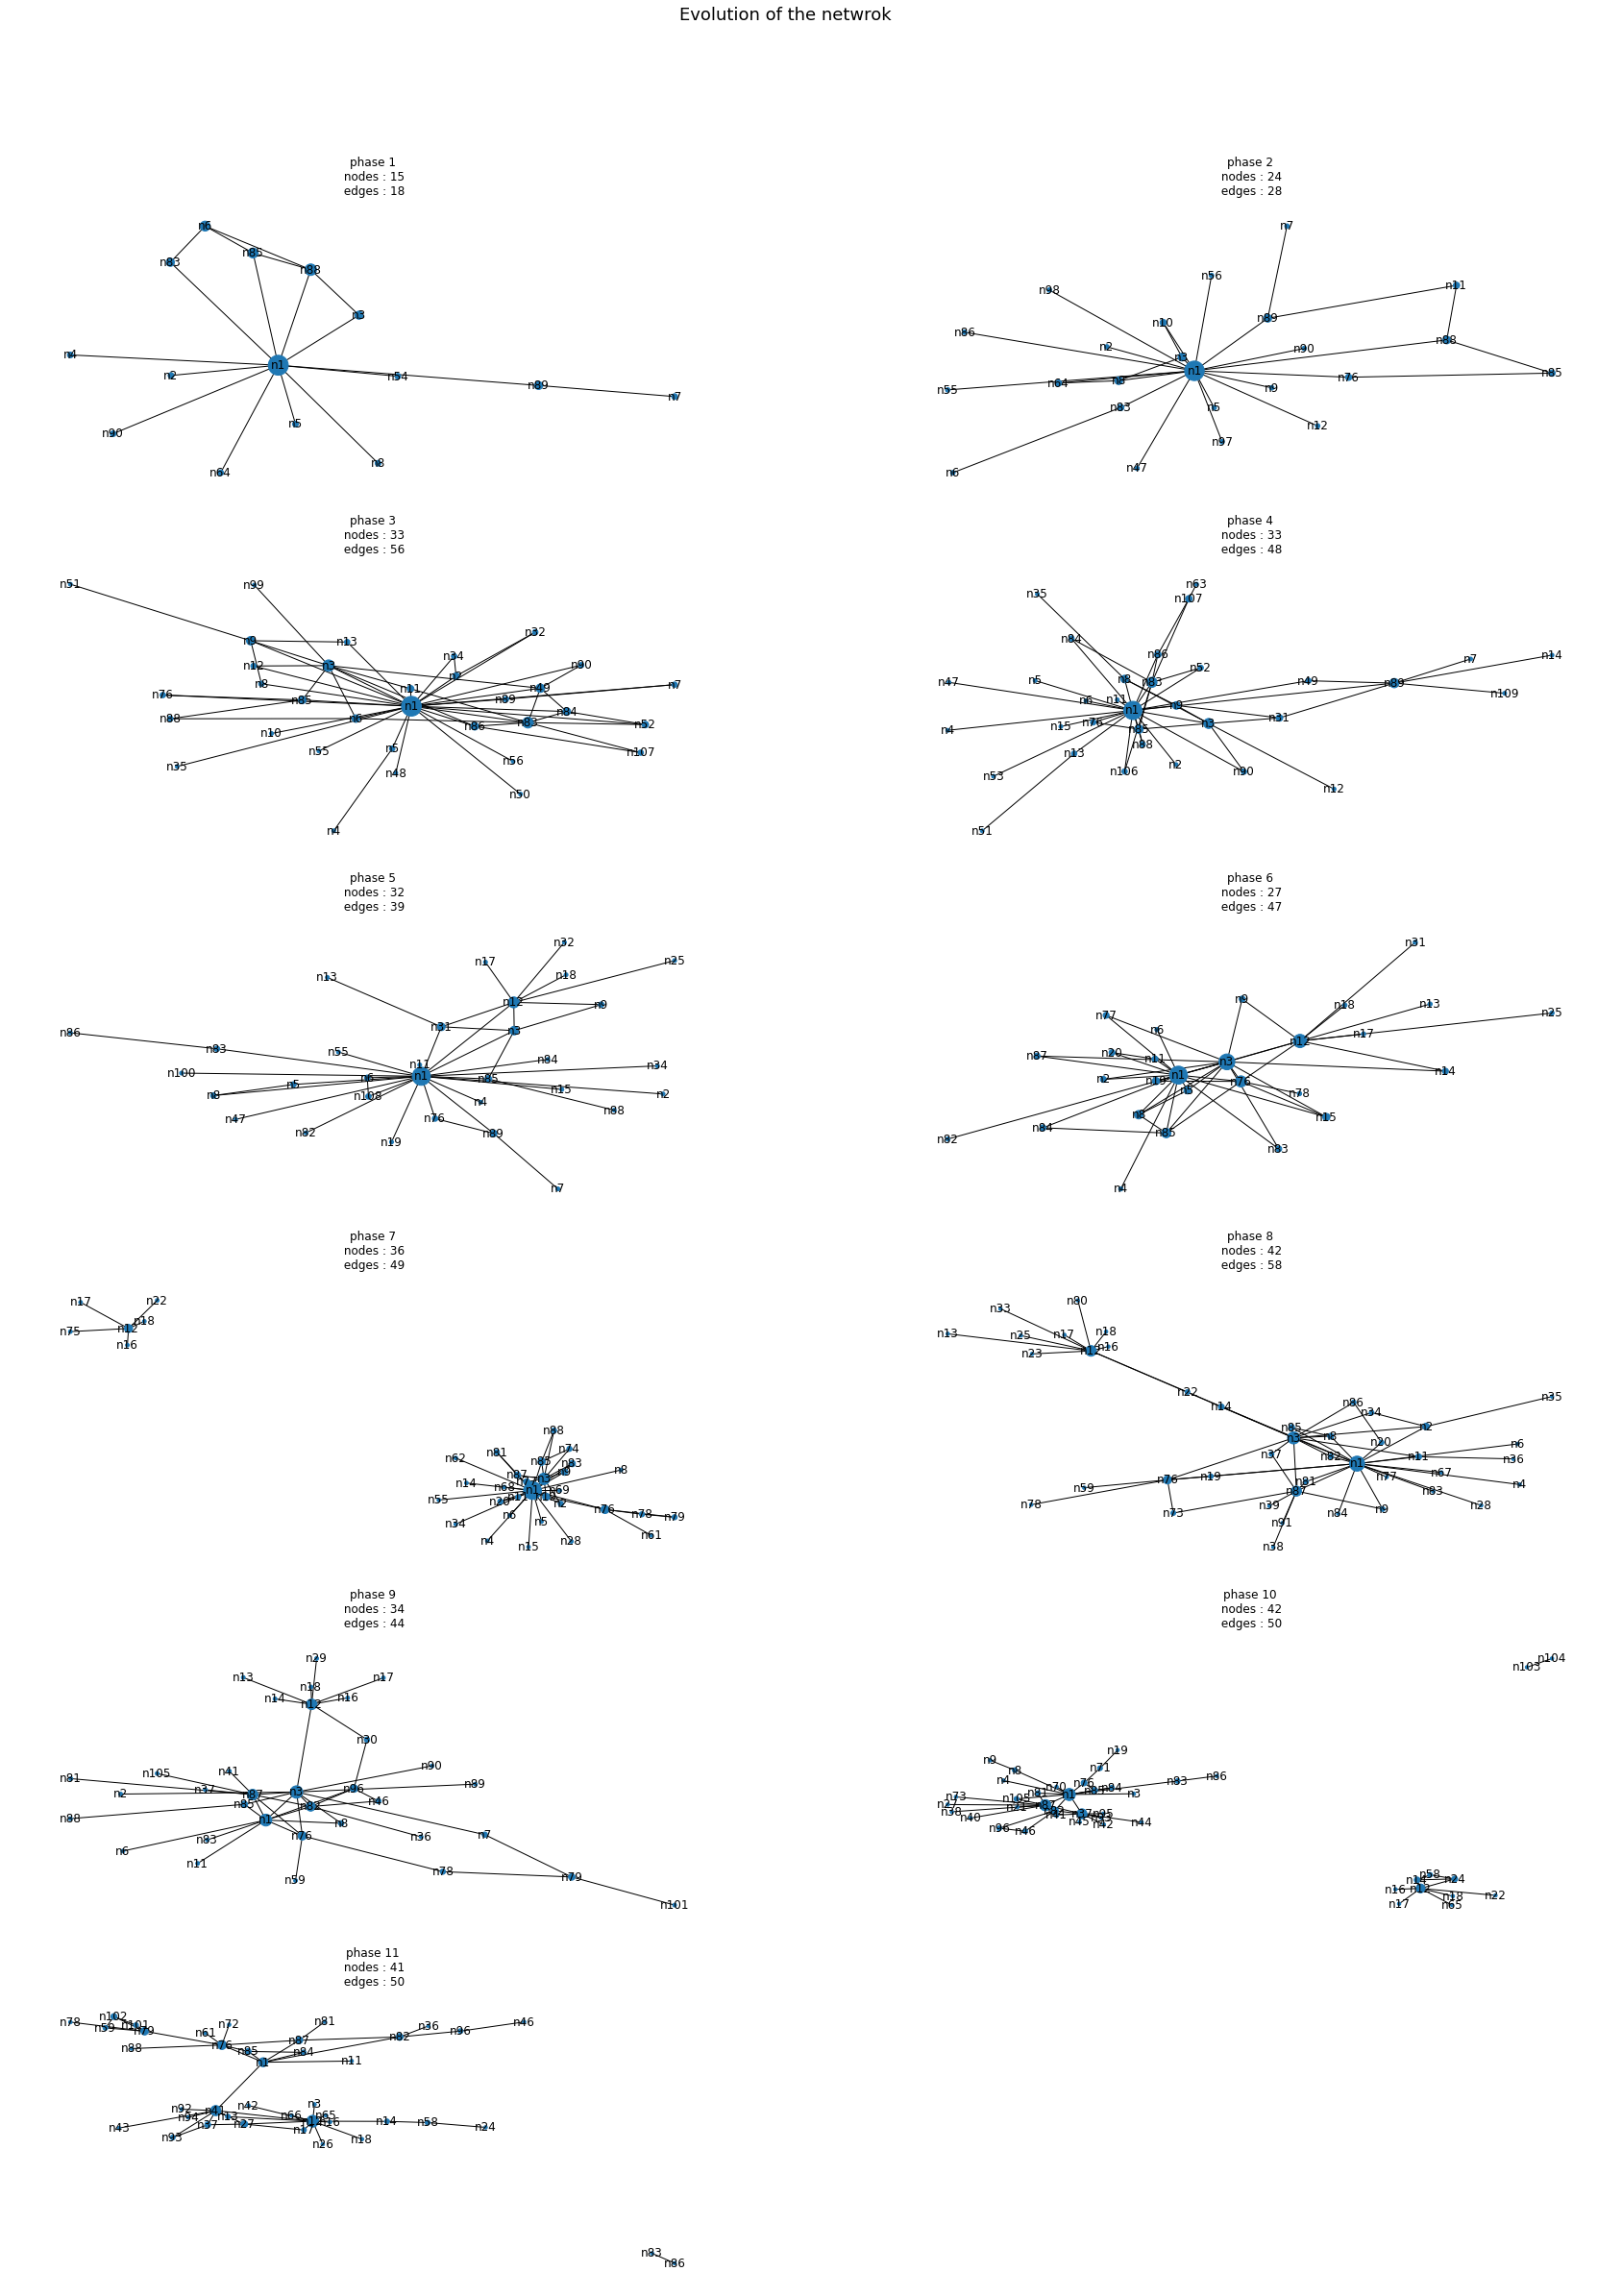

In [29]:
# creating plot grid
fig, axs = plt.subplots(squeeze=True,nrows=6, ncols=2, figsize=(30, 40),)
plt.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrok", fontsize=18, y=0.95)

# loop throught the phases and draw them 
for i, ax in zip(range(len(A)), axs.ravel()):
    ax.set_title(f"phase {i+1}" + "\n" + f" nodes : {G[i+1].number_of_nodes()}"+ "\n" +
                 f" edges : {G[i+1].number_of_edges()}" )
    ns = nx.degree_centrality(G[i+1]) # get the degree centrality for each node
    nx.draw(G[i+1], with_labels=True, ax=ax,node_size=[i*500 for i in ns.values()])
    # convert to pygraphviz for better visualization later
    A[i+1].layout()
    A[i+1].draw('networkx_graph.png')


fig.delaxes(axs[5,1]) # delete the empty ax in fig
fig.show()

Above we could see how the criminal netwrok was evolving. During the first 3 phases we can notice large increase in the size. The number of nodes representing the actors in the network more than doubled
We could speculated about why is that. One possibility is to attribute this behavior of the netwrok to lack of police intervention in this period

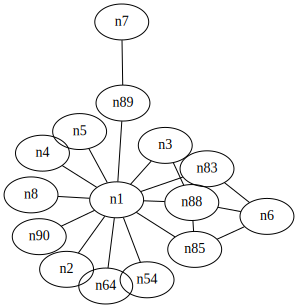

In [35]:
A[1]

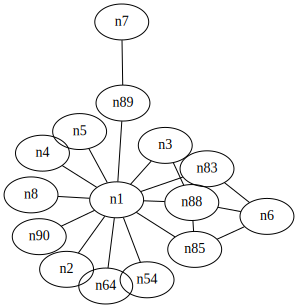

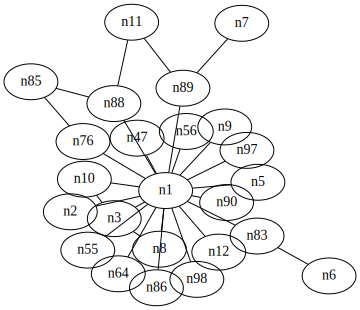

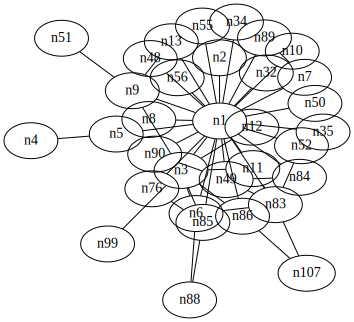

In [30]:
display(A[1])
display(A[2])
display(A[3])

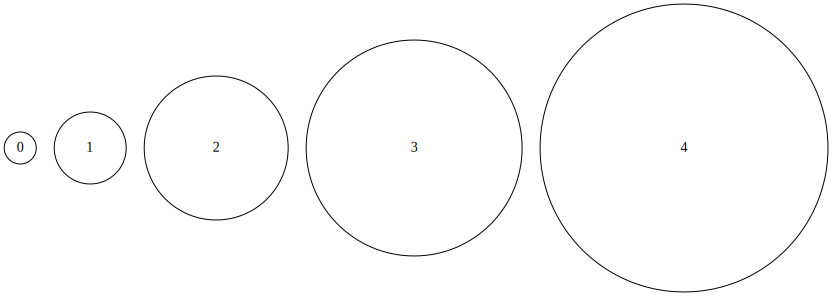

In [39]:
g = gv.Graph(format='png')
for i in range(5):
    g.node(str(i), **{'width':str(i), 'height':str(i)})
g.render('example')
g


KeyError: 2

<Figure size 432x288 with 0 Axes>